In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
from model.SVD_Label import SVD_Label
from model.NMF_Label import NMF_Label
from model.WE_Label import WE_Label

# Setting 

In [2]:
FD_DATA = './data/'
FD_WEIGHT = './weight/'
FN_DATA = FD_DATA + 'data_sample.csv'
# FN_WEIGHT = FD_WEIGHT + 'weight_SVD.p'
# FN_WEIGHT = FD_WEIGHT + 'weight_NMF.p'
FN_WEIGHT = FD_WEIGHT + 'weight_WE.p'

# Load Data

In [3]:
df = pd.read_csv(FN_DATA, encoding='latin-1')
N = df.shape[0]

# Map label to label description 
map_l2d = dict(df.groupby(by='LABEL')['LABEL_DESC'].first().reset_index().values.tolist())

df.columns, N

(Index(['DESC', 'LABEL', 'LABEL_DESC'], dtype='object'), 9327)

# Tune hyper-parameter 

In [4]:
universe_desc = set(chain.from_iterable(df.DESC.str.split().values))
universe_label = set(df.LABEL.values)

In [5]:
# Dataset
x = df.DESC.str.split().values
y = df.LABEL.values

# Shuffle
idx = np.arange(N)
np.random.seed(42)
np.random.shuffle(idx)
x, y = x[idx], y[idx]

x_train, y_train = x[:-np.floor(N*0.1).astype(np.int)], y[:-np.floor(N*0.1).astype(np.int)]
x_test, y_test = x[-np.floor(N*0.1).astype(np.int):], y[-np.floor(N*0.1).astype(np.int):]

# Train SVD Labeller

/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Explained variance: 0.689094781889387
n 5, acc 0.2628755364806867
Explained variance: 0.9466306005936295
n 10, acc 0.4055793991416309
Explained variance: 0.9996014068938784
n 20, acc 0.7864806866952789
Explained variance: 0.9996616282836314
n 21, acc 0.7843347639484979
Explained variance: 0.9996957849463903
n 22, acc 0.7864806866952789
Explained variance: 0.9997221113695819
n 23, acc 0.7886266094420601
Explained variance: 0.9997475282177607
n 24, acc 0.7864806866952789
Explained variance: 0.999770773803774
n 25, acc 0.7757510729613734
Explained variance: 0.9997889575094088
n 26, acc 0.7650214592274678
Explained variance: 0.9998074466269502
n 27, acc 0.7585836909871244
Explained variance: 0.9998241979570673
n 28, acc 0.75
Explained variance: 0.9998399069258712
n 29, acc 0.7457081545064378
Explained variance: 0.9998517961212905
n 30, acc 0.7489270386266095
Explained variance: 0.9999194458162884
n 40, acc 0.73068669527897
Explained variance: 0.9999544009186269
n 50, acc 0.7006437768240343

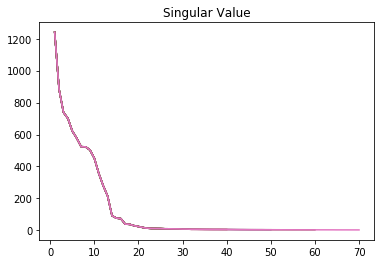

In [14]:
df_perf = pd.DataFrame()

for n_components in (5, 10, 20) + tuple(range(21, 30)) + (30, 40, 50, 60, 70):
    
        FN_WEIGHT = './weight_dbg/weight_SVD_n{0}.p'.format(n_components)

        # Create model
        model = SVD_Label(n_components=n_components)

        # Build
        model.build(universe_x=universe_desc, universe_y=universe_label)

        # Compile
        model.compile()

        # Fit
        model.fit(x_train, y_train, verbose=True)

        # Save
        model.save_model(FN_WEIGHT)
        
        # Load
        model.load_model(FN_WEIGHT)

        # Inference
        y_pred = model.predict(x_test)

        # Evaluate
        perc_match = (y_pred == y_test).sum() / y_test.shape[0]
        print('n {0}, acc {1}'.format(n_components, perc_match))
        
        df_perf = df_perf.append(pd.DataFrame({'n_components': [n_components],
                                               'accuracy': [perc_match]}))
        
        
        

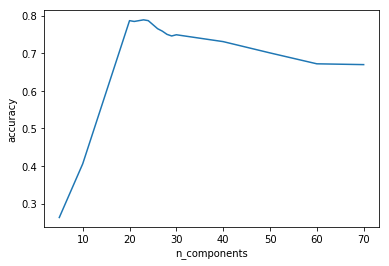

In [15]:
sns.lineplot(x='n_components', y='accuracy', data=df_perf)

In [16]:
param_optim = {'n_components': 23}

# Train NMF Labeller

In [7]:
df_perf = pd.DataFrame()

for n_components in (5, 10, 20, 30, 40, 50, 60, 70, 78):
    
        FN_WEIGHT = './weight_dbg/weight_NMF_n{0}.p'.format(n_components)

        # Create model
        model = NMF_Label(n_components=n_components)

        # Build
        model.build(universe_x=universe_desc, universe_y=universe_label)

        # Compile
        model.compile()

        # Fit
        model.fit(x_train, y_train, verbose=True)

        # Save
        model.save_model(FN_WEIGHT)
        
        # Load
        model.load_model(FN_WEIGHT)

        # Inference
        y_pred = model.predict(x_test)

        # Evaluate
        perc_match = (y_pred == y_test).sum() / y_test.shape[0]
        print('n {0}, acc {1}'.format(n_components, perc_match))
        
        df_perf = df_perf.append(pd.DataFrame({'n_components': [n_components],
                                               'accuracy': [perc_match]}))
        
        
        

/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 1274.73023686644, Raw matrix norm: 1240.55692476515
n 5, acc 0.13412017167381973


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 528.3251757325711, Raw matrix norm: 1240.55692476515
n 10, acc 0.11158798283261803


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 46.05451414309821, Raw matrix norm: 1240.55692476515
n 20, acc 0.4388412017167382


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 32.00564755704707, Raw matrix norm: 1240.55692476515
n 30, acc 0.5912017167381974


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 26.215538132375038, Raw matrix norm: 1240.55692476515
n 40, acc 0.6030042918454935


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 21.148811673291682, Raw matrix norm: 1240.55692476515
n 50, acc 0.6899141630901288


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 18.054200245236256, Raw matrix norm: 1240.55692476515
n 60, acc 0.7049356223175965


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 14.132829723853755, Raw matrix norm: 1240.55692476515
n 70, acc 0.723175965665236


/home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)


Recon error: 13.330039630596765, Raw matrix norm: 1240.55692476515
n 78, acc 0.6716738197424893


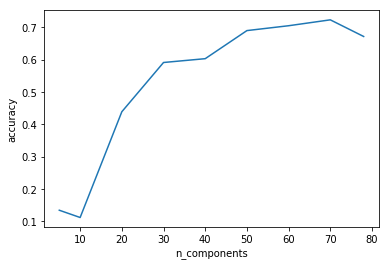

In [8]:
sns.lineplot(x='n_components', y='accuracy', data=df_perf)

In [9]:
param_optim = {'n_components': 70}

# Train WE Labeller

In [10]:
df_perf = pd.DataFrame()

for embedding_size in (10, 20, 30, 40, 50, 60, 70):
    for num_sampled in (5, 10, 20):
    
        FN_WEIGHT = './weight_dbg/weight_WE_emb{0}_nce{1}.p'.format(embedding_size, num_sampled)

        # Create model
        model = WE_Label(word_size=N,
                         vocabulary_size=len(universe_desc),
                         label_size=len(universe_label),
                         embedding_size=embedding_size)

        # Build
        model.build(universe_x=universe_desc, universe_y=universe_label)

        # Compile
        model.compile(num_sampled=num_sampled)     # num_samples:   no. of negative samples in tf.nn.nce_loss


        model.fit(x_train, y_train, verbose=True)

        # Save
        model.save_model(FN_WEIGHT)

        # Load
        model.load_model(FN_WEIGHT)

        # Inference
        y_pred = model.predict(x_test)

        # Evaluate
        perc_match = (y_pred == y_test).sum() / y_test.shape[0]
        print('emb {0}, nce {1}, acc {2}'.format(embedding_size, num_sampled, perc_match))
        
        df_perf = df_perf.append(pd.DataFrame({'embedding_size': [embedding_size],
                                               'num_sampled': [num_sampled],
                                               'accuracy': [perc_match]}))        
        
        
        

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Initialized
Save BEST model at step 530 (3.824)..........] - ETA: 13:56 - loss: 12.3857 - val loss: 5.2432 - accuracy: 0.0000e+00 - val accuracy: 0.0072 WARNING:tensorflow:From /home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/tensorflow/python/training/saver.py:966: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
 41300/100000 [===========>..................] - ETA: 5:55 - loss: 0.0583 - val loss: 0.6295 - accuracy: 1.0000 - val accuracy: 0.8510
Plateau reached.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-7210

Reduce lr to 0.0005000000237487257
 62100/100000 [=================>............] - ETA:

 53200/100000 [==============>...............] - ETA: 4:16 - loss: 0.0559 - val loss: 1.1492 - accuracy: 1.0000 - val accuracy: 0.8427
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-4730

Reduce lr to 0.0002500000118743628
 83400/100000 [========================>.....] - ETA: 1:24 - loss: 0.0479 - val loss: 0.8334 - accuracy: 0.9688 - val accuracy: 0.8498
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-4730

Reduce lr to 0.0001250000059371814
100000/100000 [==============================] - 499s 5ms/step - loss: 0.0452 - val loss: 0.5593 - accuracy: 1.0000 - val accuracy: 0.8379
emb 30, nce 5, acc 0.8680257510729614
Initialized
 31400/100000 [========>.....................] - ETA: 5:03 - loss: 0.1049 - val loss: 1.2652 - accuracy: 0.9375 - val accuracy: 0.8617
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-6880

Reduce lr to 0.0005000000237487257
 58300/100000 [================>.............] - ETA: 3:04

 29200/100000 [=======>......................] - ETA: 5:20 - loss: 0.6673 - val loss: 0.9719 - accuracy: 0.9688 - val accuracy: 0.8665
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-4660

Reduce lr to 0.0005000000237487257
 46700/100000 [=============>................] - ETA: 3:59 - loss: 0.5175 - val loss: 1.2722 - accuracy: 1.0000 - val accuracy: 0.8665
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-31420

Reduce lr to 0.0002500000118743628
 64100/100000 [==================>...........] - ETA: 2:41 - loss: 0.3171 - val loss: 0.8470 - accuracy: 0.9062 - val accuracy: 0.8737
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-31420

Reduce lr to 0.0001250000059371814
 88200/100000 [=========================>....] - ETA: 52s - loss: 0.0842 - val loss: 1.3570 - accuracy: 0.9688 - val accuracy: 0.8737
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-31420

Reduce lr to 6.25000029685907


Reduce lr to 0.0001250000059371814
 75100/100000 [=====================>........] - ETA: 1:51 - loss: 0.3722 - val loss: 0.9527 - accuracy: 1.0000 - val accuracy: 0.8677
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-4150

Reduce lr to 6.25000029685907e-05
 89300/100000 [=========================>....] - ETA: 48s - loss: 0.4497 - val loss: 0.7800 - accuracy: 0.9688 - val accuracy: 0.8653
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-4150

Reduce lr to 3.125000148429535e-05
100000/100000 [==============================] - 449s 4ms/step - loss: 0.5247 - val loss: 1.4237 - accuracy: 0.9375 - val accuracy: 0.8665
emb 70, nce 10, acc 0.851931330472103
Initialized
 21200/100000 [=====>........................] - ETA: 5:55 - loss: 0.6455 - val loss: 1.8493 - accuracy: 0.9688 - val accuracy: 0.8629
Plateau reached.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-4190

Reduce lr to 0.0005000000237487257
 41600/100000 [=========

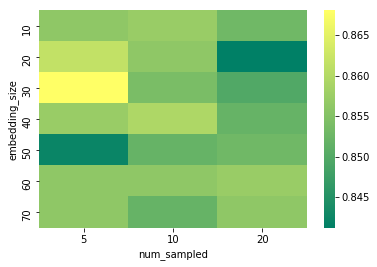

In [11]:
sns.heatmap(df_perf.pivot(index='embedding_size', columns='num_sampled', values='accuracy'), cmap='summer')

In [12]:
param_optim = {'embedding_size': 30,
               'num_sampled': 5}